In [1]:
import pandas as pd
from numpy import linalg as LA
import numpy as np
csv_readerOnline = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
a=np.row_stack((csv_readerOnline['sepal_length'],csv_readerOnline['sepal_width']))
#Ejercicio 1
print('-------------------------PRIMER EJERCICIO----------------')
def getstats( array ):
    return np.mean(array, axis=1), np.cov(array)

def geteigen( array ):
    eignvalues, eignvectors = LA.eig(array)
    return eignvalues, eignvectors

print('Sample Mean\n',getstats(a)[0])
print('\nSample Covariance Matrix\n',getstats(a)[1])
print('\neignvalues\n',geteigen(getstats(a)[1])[0])
print('\neignvectors\n',geteigen(getstats(a)[1])[1])

-------------------------PRIMER EJERCICIO----------------
Sample Mean
 [5.84333333 3.054     ]

Sample Covariance Matrix
 [[ 0.68569351 -0.03926846]
 [-0.03926846  0.18800403]]

eignvalues
 [0.6887728  0.18492474]

eignvectors
 [[ 0.99693955  0.07817635]
 [-0.07817635  0.99693955]]


In [34]:
## Instructor's remarks
## Unit Test for exercise 1
A = np.array([[17, 24,  1,  8, 15],
 [23,  5,  7, 14, 16],
 [ 4,  6, 13, 20, 22],
 [10, 12, 19, 21,  3],
 [11, 18, 25,  2,  9]])

## Ground truth for mean and covariance
meanA = np.array([13., 13., 13., 13., 13.])
covA = np.array([[ 42.,   4., -30., -15.,  -1.],
 [  4.,  52.,  -6., -35., -15.],
 [-30.,  -6.,  72.,  -6., -30.],
 [-15., -35.,  -6.,  52.,   4.],
 [ -1., -15., -30.,   4.,  42.]])
mean, cov = getstats(A)
print(mean == meanA)
print(cov == covA)

## Ground truth for eigentvectors
vals, vectors = geteigen(covA)
evectorsA = np.array([[ 4.47213595e-01,  3.69278287e-01,  6.62726001e-01,  2.46564896e-01, -4.04516436e-01],
 [ 4.47213595e-01, -5.47694274e-01, -2.46564896e-01,  6.62726001e-01,  -5.56615971e-03],
 [ 4.47213595e-01,  3.56831975e-01,  9.45136083e-17,  4.88608514e-15,  8.20165192e-01],
 [ 4.47213595e-01, -5.47694274e-01,  2.46564896e-01, -6.62726001e-01, -5.56615971e-03],
 [ 4.47213595e-01,  3.69278287e-01, -6.62726001e-01, -2.46564896e-01, -4.04516436e-01]])
evectorsB = np.array([[ 4.04516436e-01,  2.46564896e-01, -4.47213595e-01, 6.62726001e-01,  3.69278287e-01],
       [ 5.56615971e-03,  6.62726001e-01, -4.47213595e-01, -2.46564896e-01, -5.47694274e-01],
       [-8.20165192e-01,  6.94117907e-15, -4.47213595e-01, 2.32193763e-16,  3.56831975e-01],
       [ 5.56615971e-03, -6.62726001e-01, -4.47213595e-01, 2.46564896e-01, -5.47694274e-01],
       [ 4.04516436e-01, -2.46564896e-01, -4.47213595e-01, -6.62726001e-01,  3.69278287e-01]])
print(np.isclose(vectors, evectorsA))
print(np.isclose(vectors, evectorsB)) ## this must be true if linalg.eig is used instead of eigh


## The covariance matrix is wrong. Somehow, it is the covariance of the transposed matrix and without bias
# (while we always use the one with bias in the lecture). I assign .5 points

[ True  True  True  True  True]
[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]
[[False False False False False]
 [False False False False False]
 [False False False  True False]
 [False False False False False]
 [False False False False False]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


-------------------------SEGUNDO EJERCICIO----------------








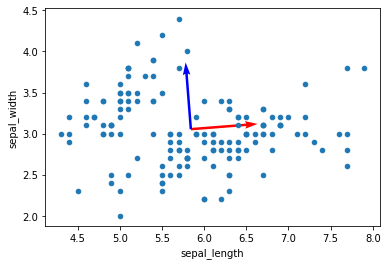

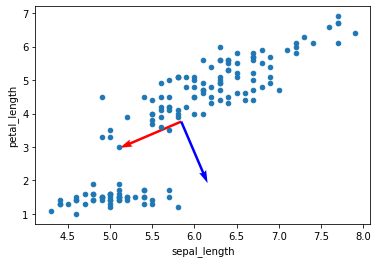

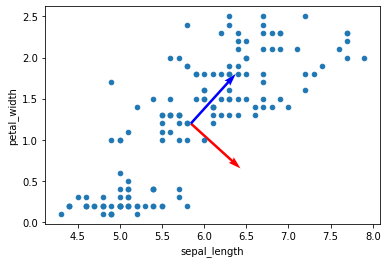

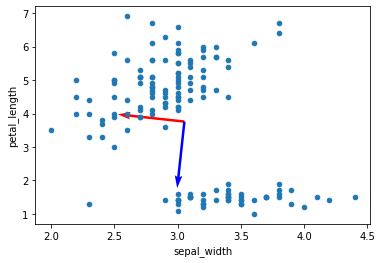

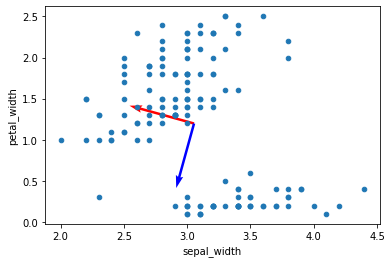

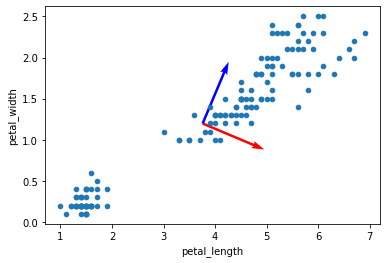

In [26]:
import matplotlib.pyplot as plt
#Ejercicio 2
print('-------------------------SEGUNDO EJERCICIO----------------')
labels=[]
for i in csv_readerOnline:
    labels.append(i)
for i in range(0,len(labels)-1):
    for j in range(i,len(labels)-1):
        if labels[i]!=labels[j]:
            print()
            fig, ax = plt.subplots()
            x=csv_readerOnline[labels[i]]
            y=csv_readerOnline[labels[j]]
            datos =getstats(np.row_stack((x,y)))
            origin =datos[0]
            Vector=geteigen(datos[1])[1]
            ax.quiver(*origin, Vector[:,0], Vector[:,1], color=['r','b','g'], scale=5)
            ax.scatter(x,y,s=21)
            ax.set_xlabel(labels[i])
            ax.set_ylabel(labels[j])
            

In [28]:
## Instructor's remarks: the plots clearly show that the eigenvectors are not computed correctly,
## because the point into the wrong direction. Still the plots are good, 1 point.

-------------------------TERCER EJERCICIO----------------


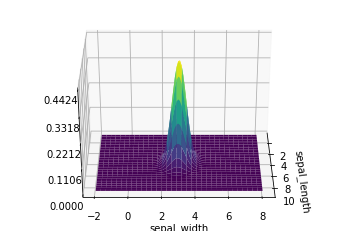

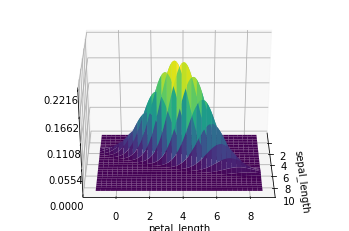

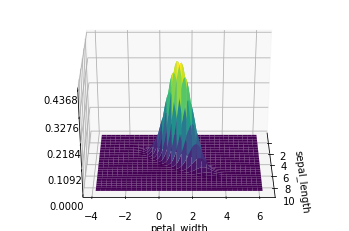

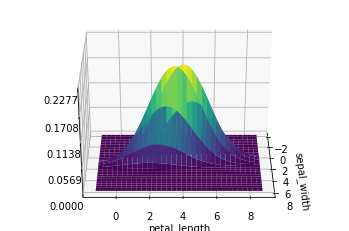

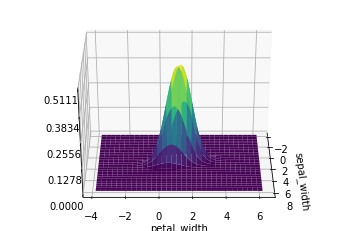

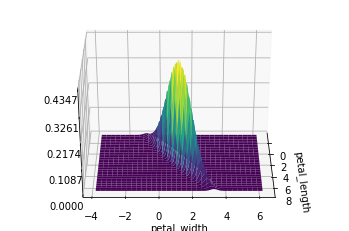

In [29]:
#Ejercicio 3
print('-------------------------TERCER EJERCICIO----------------')
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
for i in range(0,len(labels)-1):
    for j in range(i,len(labels)-1):
        if labels[i]!=labels[j]:
            datos =getstats(np.row_stack((csv_readerOnline[labels[i]],csv_readerOnline[labels[j]])))
            N = 100
            X = np.linspace(datos[0][0]-5, datos[0][0]+5, N)
            Y = np.linspace(datos[0][1]-5, datos[0][1]+5, N)
            X, Y = np.meshgrid(X, Y)
            mu = datos[0]
            Sigma = datos[1]
            pos = np.empty(X.shape + (2,))
            pos[:, :, 0] = X
            pos[:, :, 1] = Y
            def multivariate_gaussian(pos, mu, Sigma):
                n = mu.shape[0]
                Sigma_det = np.linalg.det(Sigma)
                Sigma_inv = np.linalg.inv(Sigma)
                N = np.sqrt((2*np.pi)**n * Sigma_det)
                fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
                return np.exp(-fac / 2) / N
            Z = multivariate_gaussian(pos, mu, Sigma)
            fig = plt.figure()
            ax = fig.gca(projection='3d')
            ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,cmap=cm.viridis)
            ax.set_zlim(np.min(Z),np.max(Z))
            ax.set_xlabel(labels[i])
            ax.set_ylabel(labels[j])
            ax.set_zticks(np.linspace(0,np.max(Z),5))#legendas
            ax.view_init(30,0)#angulo de vision y,x

-------------------------CUARTO EJERCICIO----------------
 How are the covariance matrices different?



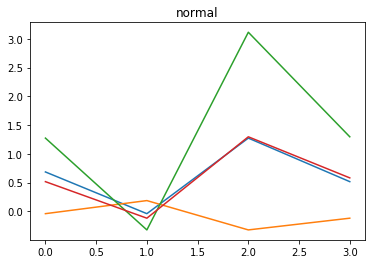

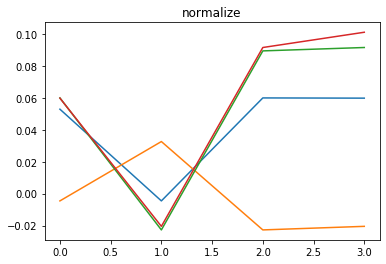

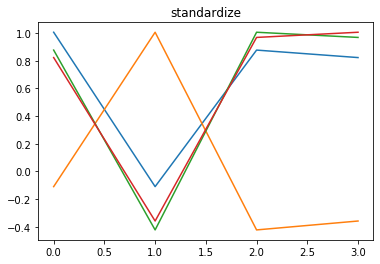

Covariance of normal
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]

Covariance of normalize
 [[ 0.05290845 -0.00454496  0.05996621  0.05982683]
 [-0.00454496  0.03263959 -0.02271983 -0.02048285]
 [ 0.05996621 -0.02271983  0.08943348  0.09155279]
 [ 0.05982683 -0.02048285  0.09155279  0.1011136 ]]
covarianza mas baja  -0.02271982709589353  entre  sepal_width  y  petal_length
covarianza mas alta  0.10111359681829481  entre  petal_width  y  petal_width

Covariance of standardize
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
covarianza mas baja  -0.4233383520816992  entre  sepal_width  y  petal_length
covarianza mas alta  1.0067114093959746  entre  petal_length  y  petal_leng

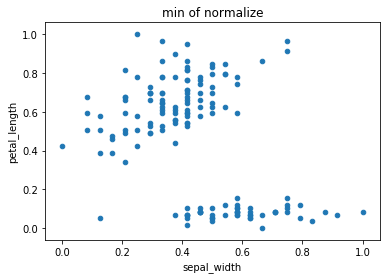

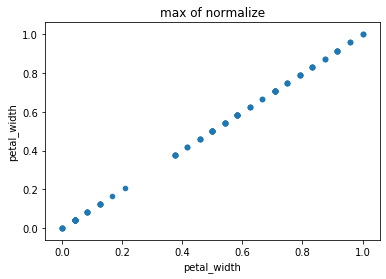

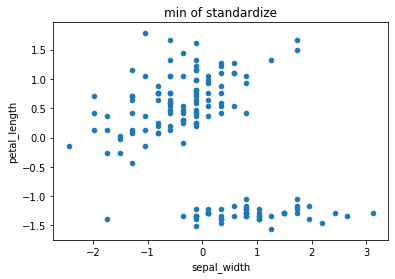

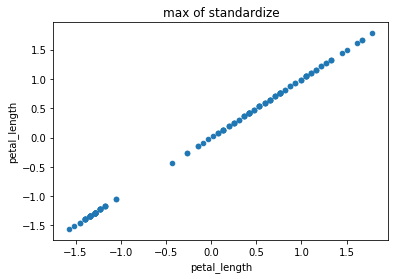

In [30]:
#Ejercicio 4
print('-------------------------CUARTO EJERCICIO----------------')
normal=csv_readerOnline.iloc[:,0:4]
normalize=csv_readerOnline.iloc[:,0:4]
standardize=csv_readerOnline.iloc[:,0:4]
#normalize
for i in range(0,len(labels)-1):
    v = normalize[labels[i]]   # foo[:, -1] for the last column
    normalize[labels[i]] = ( normalize[labels[i]] - v.min()) / (v.max() - v.min())
    M=np.column_stack(normalize[labels[i]])
#standardize
standardize = (standardize - np.mean(standardize)) / np.std(standardize)
print(' How are the covariance matrices different?\n',)
plt.plot(np.cov(normal.T))
plt.title("normal")
plt.show()
plt.plot(np.cov(normalize.T))
plt.title("normalize")
plt.show()
plt.plot(np.cov(standardize.T))
plt.title("standardize")
plt.show()
print('Covariance of normal\n',np.cov(normal.T))
copias =[np.cov(normalize.T),np.cov(standardize.T)]

for i in range(0,len(copias)):
    nombre=""
    if i==0:
        print('\nCovariance of normalize\n',copias[i])
        nombre='normalize'
        modificada=normalize
    else:
        print('\nCovariance of standardize\n',copias[i])
        nombre='standardize'
        modificada=standardize
        
    tab=copias[i]
    
    mini=np.min(tab)
    indexmin=np.where(tab==mini)
    labelsMin=[labels[indexmin[0][0]],labels[indexmin[0][1]]]
    print('covarianza mas baja ',mini,' entre ',labelsMin[0],' y ' ,labelsMin[1])
    
    fig, ax = plt.subplots()
    x=modificada[labelsMin[0]]
    y=modificada[labelsMin[1]]
    ax.scatter(x,y,s=21)
    ax.set_xlabel(labelsMin[0])
    ax.set_ylabel(labelsMin[1])
    ax.set_title('min of '+nombre)
        
    maxi=np.max(tab)
    indexMax=np.where(tab==maxi)
    labelsMax=[labels[indexMax[0][0]],labels[indexMax[0][0]]]
    
    print('covarianza mas alta ',maxi,' entre ',labelsMax[0],' y ' ,labelsMax[1])
    fig, ax = plt.subplots()
    x=modificada[labelsMax[0]]
    y=modificada[labelsMax[1]]
    ax.scatter(x,y,s=21)
    ax.set_xlabel(labelsMax[0])
    ax.set_ylabel(labelsMax[1])
    ax.set_title('max of '+nombre)



In [31]:
## Instructor's remark: normalization and standardization seem to work correctly:
print(np.isclose(np.min(normalize, axis=0), np.zeros(4)))
print(np.isclose(np.max(normalize, axis=0), np.ones(4)))
mean = np.average(standardize, axis=0)
covariances = 1/standardize.shape[0]*np.dot(np.transpose(standardize - mean), standardize - mean)
print(np.isclose(mean, np.zeros(4)))
print(np.isclose(np.diag(covariances), np.ones(4)))

[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]


In [35]:
## Instructor's remark: In the maximum correlation, you made the mistake to consider elements on the diagonal,
# which are of course maximally correlated (petal length with petal length for example). Still I assign .75

### Total points: .5 + 1 + 1 + .75 = 3